In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("QueryResults.csv").iloc[:,:3]

In [3]:
data.head(3)

,Title,Body,Tags
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>
1,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>
2,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...


In [4]:
tags_list = []
tags_list = data['Tags'].apply(lambda x : nltk.tokenize.word_tokenize(x))
tags_list = tags_list.apply(lambda x : [i for i in x if not i in ['<', '>']])
tags_list = tags_list.explode().reset_index(drop=True)

In [5]:
top_10_tags = tags_list.value_counts()[:11].index.tolist()
tags_list = tags_list[tags_list.isin(top_10_tags)].reset_index(drop=True)

In [6]:
for i in range(len(tags_list)) :
    if tags_list[i] == 'c' and tags_list[i+1] == '#' :
        tags_list = tags_list.replace(tags_list[i], ' ').replace(tags_list[i+1], 'c#')

In [7]:
tags_list = tags_list[tags_list != ' '].reset_index(drop=True)
top_10_tags = tags_list.value_counts()[:11].index.tolist()

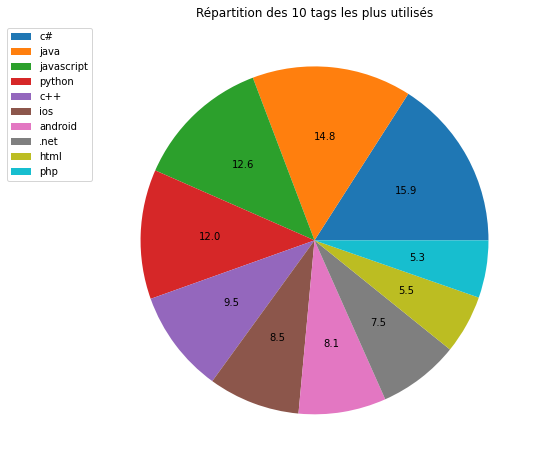

In [8]:
plt.figure(figsize = (10,8))
plt.pie(tags_list.value_counts(), labels = top_10_tags, labeldistance = None, 
        autopct = '%1.1f')
plt.title("Répartition des 10 tags les plus utilisés")
plt.legend(bbox_to_anchor=(0.0, 1))
plt.show()

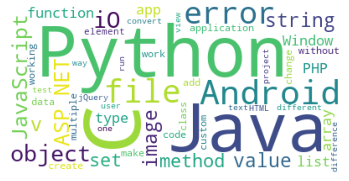

In [14]:
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, max_words = 50).generate(
    ' '.join(data['Title'].tolist()))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
def find_top_tags(data, tags_list = tags_list) :
    for tag in tags_list.unique() :
        if tag in data :
            data = data + " " + tag + " "
    data = data.split(' ')[1::2]
    return data

In [10]:
tmp = data['Tags'].apply(find_top_tags)
empty_tag_index = tmp.explode().reset_index()[tmp.explode().reset_index()['Tags'].isna()]['index'].values.tolist()

In [11]:
data = data.drop(index = empty_tag_index)
data['Tags'] = tmp
data = data.reset_index(drop = True)

In [29]:
data.to_csv("data.csv", index = False)

In [15]:
file = open('top_10_tags.txt','w')
for tag in top_10_tags :
    file.write(tag + "\n")
file.close()